Calculating the London Urban Heat intensity over the data range for Tasmax . I will
1) Locate the Urban Grid Box's and the Rural Gridboxes.

2) Slice the data file for just the JJA range (as this is where the major heat fluctuations occur. 

3) Calculate the Urban Heat Itensity by averaging between rural and urban areas, and then doing TasmaxUrban- Tasmax rural 

4) Then I will create a climatology graph for this

5) I will aim to then do this for each city, and have it all on the same graph for tasmax 

6) I will then repeat this for Tasmin

In [81]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.image as mpimg
import netCDF4 as nc

In [82]:
UF = xr.open_dataset('/Users/lucy-paigewillows/Documents/Documents – Lucy-Paige’s MacBook Air/Final Project /urban_fraction_osgb.nc')
uf= UF.urban_fraction

In [83]:
ds = xr.open_dataset('/Users/lucy-paigewillows/Documents/Documents – Lucy-Paige’s MacBook Air/Final Project /tasmax_allyears.nc')

In [84]:
tasmax=ds.tasmax

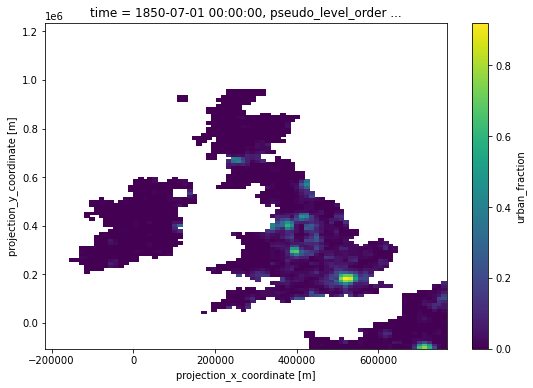

In [85]:
uf.isel(time=0).plot(size=6)

In [86]:
uf_clim_london = uf.sel(time=slice('1960-01','2020-12')).sel(projection_x_coordinate=slice(490000,550000)).sel(projection_y_coordinate= slice(160000,210000)).mean(dim='time')

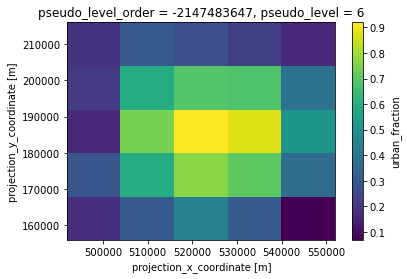

In [87]:
uf_clim_london.plot()

In [88]:
uf_clim_london.values

array([[0.18817411, 0.3058573 , 0.43484619, 0.31071315, 0.06877283],
       [0.29472334, 0.59198024, 0.77080411, 0.70808109, 0.36679526],
       [0.16484049, 0.74251243, 0.91967281, 0.87670755, 0.51690709],
       [0.21407968, 0.59076185, 0.69262482, 0.68097395, 0.38656434],
       [0.19269574, 0.30265397, 0.27670904, 0.227163  , 0.16382229]])

Here are the two highest and two lowest urban heat fractions for London, and will therefore be the 4 gridboxes that will be used to calculte the urban heat intensity for London. 

In [89]:
print(uf.sel(projection_x_coordinate=520000, projection_y_coordinate=185000, method='nearest').isel(time=0).values)
print(uf.sel(projection_x_coordinate=530000, projection_y_coordinate=185000, method='nearest').isel(time=0).values)
print(uf.sel(projection_x_coordinate=550000, projection_y_coordinate=210000, method='nearest').isel(time=0).values)
print(uf.sel(projection_x_coordinate=550000, projection_y_coordinate=160000, method='nearest').isel(time=0).values)

0.9196728134941781
0.8767075489332189
0.16382229368070453
0.06877282639196984


Here is the variables chosen, h1=highest uf gridbox, h2= second highest uf gridbox, l1= lowest uf gridbox, l2=second lowest uf gridbox. This is for everyday across the 60 years of data 

In [90]:
tasmax_london_h1 = tasmax.sel(projection_x_coordinate=520000, projection_y_coordinate=185000, method='nearest')
tasmax_london_h2 = tasmax.sel(projection_x_coordinate=530000, projection_y_coordinate=185000, method='nearest')
tasmax_london_l1 = tasmax.sel(projection_x_coordinate=550000, projection_y_coordinate=210000, method='nearest')
tasmax_london_l2 = tasmax.sel(projection_x_coordinate=550000, projection_y_coordinate=160000, method='nearest')

Here I have averaged the tasmax across the two urban grid boxes and then the two rurual gridboxes, to create a urban variable and then a rural variable. 

In [91]:
tasmax_london_urban= (tasmax_london_h1+ tasmax_london_h2)/2
tasmax_london_rural= (tasmax_london_l1+ tasmax_london_l2)/2
UI_london= tasmax_london_urban- tasmax_london_rural

In [92]:
#UI_london.plot(size=6)

Now for Glasgow 

In [93]:
uf_clim_glasgow = uf.sel(time=slice('1960-01','2020-12')).sel(projection_x_coordinate=slice(230000,290000)).sel(projection_y_coordinate= slice(640000,690000)).mean(dim='time')

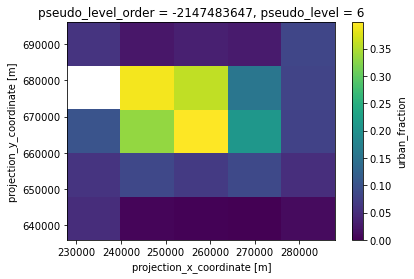

In [94]:
uf_clim_glasgow.plot()

In [95]:
uf_clim_glasgow.values

array([[0.05090737, 0.00476711, 0.00305984, 0.        , 0.01151304],
       [0.05998163, 0.0855336 , 0.0676701 , 0.08726343, 0.05267759],
       [0.10399215, 0.3334131 , 0.39781658, 0.21017423, 0.07906944],
       [       nan, 0.39089431, 0.35995926, 0.15626782, 0.08017427],
       [0.06036438, 0.02432353, 0.03511867, 0.02799433, 0.08390633]])

In [96]:
print(uf.sel(projection_x_coordinate=245000, projection_y_coordinate=680000, method='nearest').isel(time=0).values)
print(uf.sel(projection_x_coordinate=255000, projection_y_coordinate=670000, method='nearest').isel(time=0).values)
print(uf.sel(projection_x_coordinate=270000, projection_y_coordinate=640000, method='nearest').isel(time=0).values)
print(uf.sel(projection_x_coordinate=240000, projection_y_coordinate=640000, method='nearest').isel(time=0).values)

0.3908943092189045
0.39781657539356663
0.0
0.004767110294025882


In [97]:
tasmax_glasgow_h1 = tasmax.sel(projection_x_coordinate=245000, projection_y_coordinate=680000, method='nearest')
tasmax_glasgow_h2 = tasmax.sel(projection_x_coordinate=255000, projection_y_coordinate=670000, method='nearest')
tasmax_glasgow_l1 = tasmax.sel(projection_x_coordinate=270000, projection_y_coordinate=640000, method='nearest')
tasmax_glasgow_l2 = tasmax.sel(projection_x_coordinate=240000, projection_y_coordinate=640000, method='nearest')

In [98]:
tasmax_glasgow_urban= (tasmax_glasgow_h1+ tasmax_glasgow_h2)/2
tasmax_glasgow_rural= (tasmax_glasgow_l1+ tasmax_glasgow_l2)/2
UI_glasgow= tasmax_glasgow_urban- tasmax_glasgow_rural

In [99]:
UI_london_yearly= UI_london.sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')
UI_glasgow_yearly= UI_glasgow.sel(time=slice('1960-01',None)).resample(time='Y').mean(dim='time')

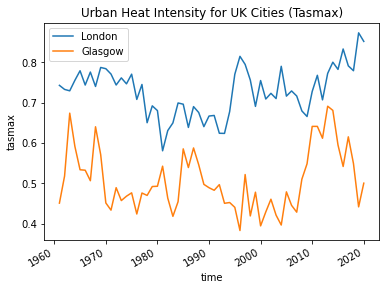

In [100]:
UI_london_yearly.plot(label='London')
UI_glasgow_yearly.plot(label='Glasgow')
plt.title('Urban Heat Intensity for UK Cities (Tasmax)')
plt.legend()

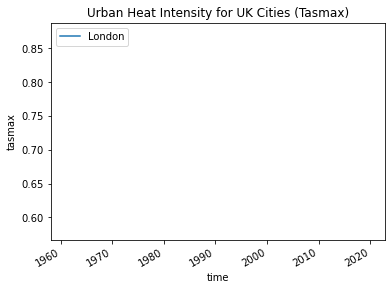

In [35]:
UI_london_monthly.plot(label='London')
plt.title('Urban Heat Intensity for UK Cities (Tasmax)')
plt.legend()

In [25]:
UI_london.groupby('time.season')

DataArrayGroupBy, grouped over 'season' 
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.